# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


In [3]:
cities

['itarema',
 'carnarvon',
 'punta arenas',
 'aklavik',
 'kaka',
 'atuona',
 'katsuura',
 'port alfred',
 'san patricio',
 'richards bay',
 'barrow',
 'ushuaia',
 'bengkulu',
 'zalantun',
 'xichang',
 'belushya guba',
 'bluff',
 'avarua',
 'port pirie',
 'ayagoz',
 'paranga',
 'deh rawud',
 'tasiilaq',
 'talen',
 'mataura',
 'inderborskiy',
 'sisimiut',
 'qaanaaq',
 'esperance',
 'puerto ayora',
 'novoye leushino',
 'albany',
 'atoyac',
 'grand river south east',
 'buin',
 'paita',
 'tayoltita',
 'pedasi',
 'tuktoyaktuk',
 'kokkola',
 'chokurdakh',
 'kodiak',
 'tiksi',
 'hermanus',
 'esik',
 'illoqqortoormiut',
 'tasbuget',
 'guerrero negro',
 'taolanaro',
 'victoria',
 'poum',
 'sidi ali',
 'aquiraz',
 'zelenoborsk',
 'saskylakh',
 'grindavik',
 'norton',
 'vallenar',
 'namibe',
 'amderma',
 'bahia blanca',
 'hithadhoo',
 'cape town',
 'kenai',
 'rikitea',
 'ilulissat',
 'krasnoselkup',
 'avera',
 'vila velha',
 'sakakah',
 'nancha',
 'ponta do sol',
 'lakhtar',
 'thompson',
 'butarita

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | itarema
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | aklavik
Processing Record 5 of Set 1 | kaka
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | katsuura
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | san patricio
Processing Record 10 of Set 1 | richards bay
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | bengkulu
Processing Record 14 of Set 1 | zalantun
Processing Record 15 of Set 1 | xichang
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | port pirie
Processing Record 20 of Set 1 | ayagoz
Processing Record 21 of Set 1 | paranga
Processing Record 22 of Set 1 | deh rawud
City not found.

Processing Record 36 of Set 4 | airai
Processing Record 37 of Set 4 | pangnirtung
Processing Record 38 of Set 4 | te anau
Processing Record 39 of Set 4 | dikson
Processing Record 40 of Set 4 | kaseda
Processing Record 41 of Set 4 | luderitz
Processing Record 42 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 4 | bawal
Processing Record 44 of Set 4 | pangody
Processing Record 45 of Set 4 | haibowan
City not found. Skipping...
Processing Record 46 of Set 4 | qostanay
Processing Record 47 of Set 4 | ponta delgada
Processing Record 48 of Set 4 | comodoro rivadavia
Processing Record 49 of Set 4 | codrington
Processing Record 0 of Set 5 | yerbogachen
Processing Record 1 of Set 5 | bambous virieux
Processing Record 2 of Set 5 | kaupanger
Processing Record 3 of Set 5 | port elizabeth
Processing Record 4 of Set 5 | bayburt
Processing Record 5 of Set 5 | igrim
Processing Record 6 of Set 5 | byron bay
Processing Record 7 of Set 5 | yar-sale
Processing Record 8 of Se

Processing Record 29 of Set 8 | dhidhdhoo
Processing Record 30 of Set 8 | mildura
Processing Record 31 of Set 8 | dudinka
Processing Record 32 of Set 8 | navalmoral de la mata
Processing Record 33 of Set 8 | nabire
Processing Record 34 of Set 8 | hauterive
Processing Record 35 of Set 8 | casablanca
Processing Record 36 of Set 8 | arraial do cabo
Processing Record 37 of Set 8 | tual
Processing Record 38 of Set 8 | ruteng
Processing Record 39 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 40 of Set 8 | brownwood
Processing Record 41 of Set 8 | the valley
Processing Record 42 of Set 8 | belaya gora
Processing Record 43 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 44 of Set 8 | camacari
Processing Record 45 of Set 8 | college
Processing Record 46 of Set 8 | shar
Processing Record 47 of Set 8 | zyryanovsk
Processing Record 48 of Set 8 | khairagarh
Processing Record 49 of Set 8 | wenatchee
Processing Record 0 of Set 9 | luwuk
Processing Record 1 of Set

Processing Record 13 of Set 12 | jaru
Processing Record 14 of Set 12 | ballina
Processing Record 15 of Set 12 | gemena
Processing Record 16 of Set 12 | nanchang
Processing Record 17 of Set 12 | sabang
Processing Record 18 of Set 12 | gbarnga
Processing Record 19 of Set 12 | fairbanks
Processing Record 20 of Set 12 | san jose
Processing Record 21 of Set 12 | solano
Processing Record 22 of Set 12 | baytown
Processing Record 23 of Set 12 | mazamari
Processing Record 24 of Set 12 | holme
Processing Record 25 of Set 12 | staritsa
Processing Record 26 of Set 12 | bay roberts
Processing Record 27 of Set 12 | teneguiban
City not found. Skipping...
Processing Record 28 of Set 12 | port-gentil
Processing Record 29 of Set 12 | ixtapa
Processing Record 30 of Set 12 | powell river
Processing Record 31 of Set 12 | syava
Processing Record 32 of Set 12 | oranjestad
Processing Record 33 of Set 12 | salalah
Processing Record 34 of Set 12 | liku
Processing Record 35 of Set 12 | saint-joseph
Processing Re

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,itarema,-2.9248,-39.9167,79.65,78,89,12.44,BR,1675202752
1,carnarvon,-24.8667,113.6333,76.96,78,67,12.80,AU,1675202752
2,punta arenas,-53.1500,-70.9167,59.11,51,75,28.77,CL,1675202752
3,aklavik,68.2191,-135.0107,-29.38,99,32,3.15,CA,1675202753
4,kaka,37.3482,59.6143,51.84,47,100,2.57,TM,1675202753


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

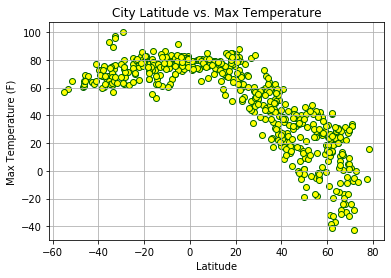

In [8]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()
ax.scatter(city_data_df['Lat'], city_data_df['Max Temp'], c = "yellow", edgecolor = "darkgreen")

# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (F)')
ax.set_title('City Latitude vs. Max Temperature') # Date ?
ax.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

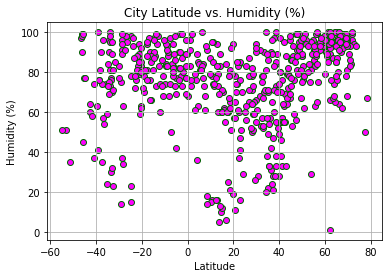

In [9]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots()
ax.scatter(city_data_df['Lat'], city_data_df['Humidity'],c = "magenta", edgecolor = "darkgreen")

# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.set_title('City Latitude vs. Humidity (%)') # Date ?
ax.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

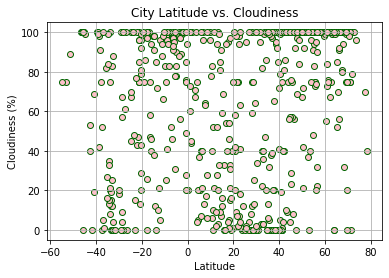

In [10]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots()
ax.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],c = "pink", edgecolor = "darkgreen")

# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.set_title('City Latitude vs. Cloudiness') # Date ?
ax.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

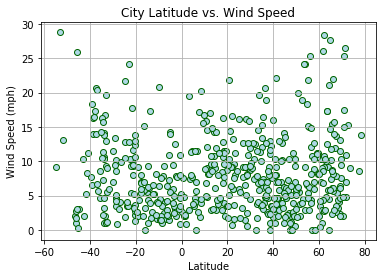

In [11]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots()
ax.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],c = "lightblue", edgecolor = "darkgreen")

# Incorporate the other graph properties
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
ax.set_title('City Latitude vs. Wind Speed') # Date ?
ax.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linreggie(x, y, xlab, ylab):
    # Calculate constants of regression equation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is {rvalue}.")
    
    # Plot data
    fig, ax = plt.subplots()
    ax.plot(x,regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    ax.scatter(x, y)
    
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    plt.legend(fontsize=9)
    
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,aklavik,68.2191,-135.0107,-29.38,99,32,3.15,CA,1675202753
4,kaka,37.3482,59.6143,51.84,47,100,2.57,TM,1675202753
6,katsuura,35.1333,140.3000,42.35,70,13,6.08,JP,1675202754
8,san patricio,28.0170,-97.5169,42.67,78,100,16.13,US,1675202755
10,barrow,71.2906,-156.7887,-7.58,84,0,26.46,US,1675202665


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,itarema,-2.9248,-39.9167,79.65,78,89,12.44,BR,1675202752
1,carnarvon,-24.8667,113.6333,76.96,78,67,12.80,AU,1675202752
2,punta arenas,-53.1500,-70.9167,59.11,51,75,28.77,CL,1675202752
5,atuona,-9.8000,-139.0333,79.09,74,83,20.83,PF,1675202754
7,port alfred,-33.5906,26.8910,69.19,95,12,1.99,ZA,1675202659


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8525669210049628.


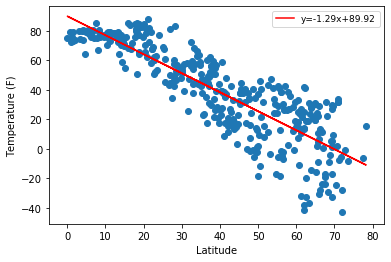

In [15]:
# Linear regression on Northern Hemisphere
# Northern Hemisphere
one = "Latitude"
two = "Temperature (F)"


linreggie(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], one, two)

The r-value is 0.43325939548090897.


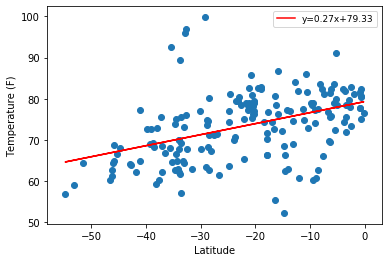

In [16]:
# Linear regression on Southern Hemisphere
one = "Latitude"
two = "Temperature (F)"


linreggie(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], one, two)

**Discussion about the linear relationship:** Latitude and temperature have a strong, negative relationship in the northern hemisphere. This means that as latitude increases (moving towards the north pole) temperature will decrease. In the southern hemisphere, a similar relationship exists, but the strength of the relationship is only moderate. As latitude increases in the southern hemisphere (getting closer to the north pole) temperature will decrease. This is a positive correlation.

These results are expected as moving away from the equator (0 degrees latitude) in either direction generally implies a decrease in temperature. This relationship may be weaker in the south as there are fewer human settlements close to the south pole as there are settlements close to the north pole. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.404761285157815.


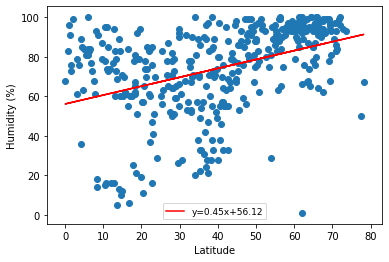

In [17]:
# Northern Hemisphere
one = "Latitude"
two = "Humidity (%)"


linreggie(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], one, two)

The r-value is 0.26259846253105945.


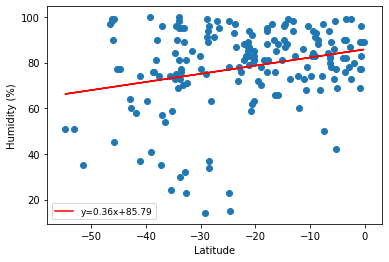

In [18]:
# Southern Hemisphere
one = "Latitude"
two = "Humidity (%)"


linreggie(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], one, two)

**Discussion about the linear relationship:** Both nothern and southern hemispheres exhibit a moderate, positive relationship between latitude and humidity. This is a fascinating result, because the northern and southern hemispheres show opposite patterns. In the north, humidity tends to increase as the distance from the equator increases, but, in the southern hemisphere, the humidity tends to decrease as one moves away from the equator.

This result may be due to the fact that our sample data comes from towns on land. Continents have varying landscapes with different humidity levels, producing outliers that decrease the strength of the linear relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.4200697477190671.


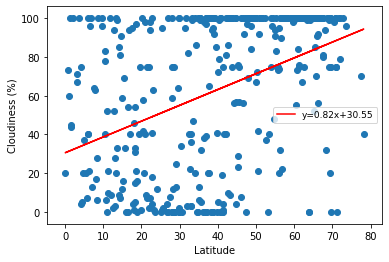

In [19]:
# Northern Hemisphere
one = "Latitude"
two = "Cloudiness (%)"


linreggie(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], one, two)

The r-value is 0.25060658801252805.


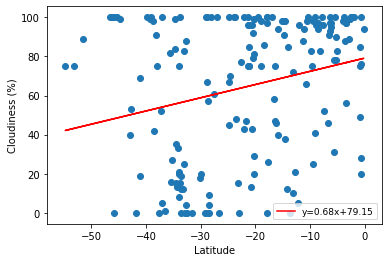

In [20]:
# Southern Hemisphere
one = "Latitude"
two = "Cloudiness (%)"


linreggie(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], one, two)

**Discussion about the linear relationship:** The relationship between latitude and cloudiness is a weak, positive linear relationship in the south and a moderate, positive relationship in the north. As above with humidity, opposite trends are displayed and cloudiness tends to decrease when moving away from the equator in the north and tends to decrease when moving awar from the equator in the south. 

Since both r-values indicate only moderate strength of relationships, caution must be used in trying to predict cloudiness using latitude values.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.06974684639663399.


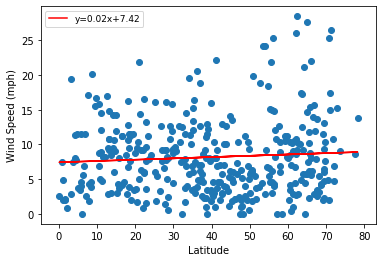

In [21]:
# Northern Hemisphere
one = "Latitude"
two = "Wind Speed (mph)"


linreggie(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], one, two)

The r-value is -0.3044029974459191.


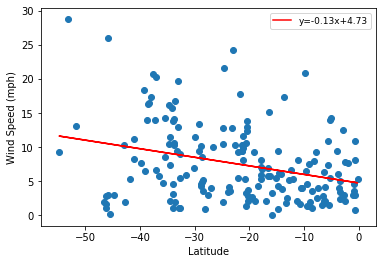

In [22]:
# Northern Hemisphere
one = "Latitude"
two = "Wind Speed (mph)"


linreggie(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], one, two)

**Discussion about the linear relationship:** In the northern hemisphere, latitude is a very weak predictor of wind speed. The equation of the line indicates that wind speed increases as latitude increases (getting closer to the north pole), but the relationship is too weak to use latitude as a predictor of wind speed in the northern hemisphere. In the southern hemisphere, a stronger, moderate, negative relationship between latitude and wind speed exists where wind speed tends to decrease as the latitude increases (distance to the equator decreases). Latitude may be used as a predictor of wind speed in the southern hemisphere, but some caution must be used.